In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

In [2]:
Banana_quality_assessment=pd.read_csv('Banana_beer_Test_data.csv',index_col=0)
Banana_quality_assessment

,Total sugar,Acetic acide,Methane,quality
Alcohol,,,,
9.4,1.9,0.700,7.4,5
9.8,2.6,0.880,7.8,5
9.8,2.3,0.760,7.8,5
9.8,1.9,0.280,11.2,6
9.4,1.9,0.700,7.4,5
...,...,...,...,...
10.5,2.0,0.600,6.2,5
11.2,2.2,0.550,5.9,6
11.0,2.3,0.510,6.3,6


In [3]:
Banana_quality_assessment.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1599 entries, 9.4 to 11.0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total sugar   1599 non-null   float64
 1   Acetic acide  1599 non-null   float64
 2   Methane       1599 non-null   float64
 3   quality       1599 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.5 KB


In [4]:
Banana_quality_assessment.dtypes

Total sugar     float64
Acetic acide    float64
Methane         float64
quality           int64
dtype: object

In [5]:
Banana_quality_assessment.head()


,Total sugar,Acetic acide,Methane,quality
Alcohol,,,,
9.4,1.9,0.70,7.4,5
9.8,2.6,0.88,7.8,5
9.8,2.3,0.76,7.8,5
9.8,1.9,0.28,11.2,6
9.4,1.9,0.70,7.4,5


In [6]:
Banana_quality_assessment.tail()

,Total sugar,Acetic acide,Methane,quality
Alcohol,,,,
10.5,2.0,0.600,6.2,5
11.2,2.2,0.550,5.9,6
11.0,2.3,0.510,6.3,6
10.2,2.0,0.645,5.9,5
11.0,3.6,0.310,6.0,6


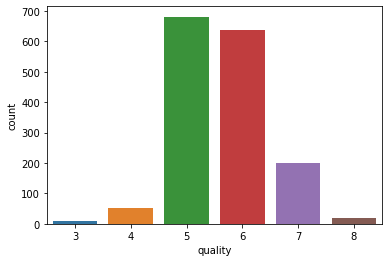

In [7]:
sns.countplot(x=Banana_quality_assessment['quality']);

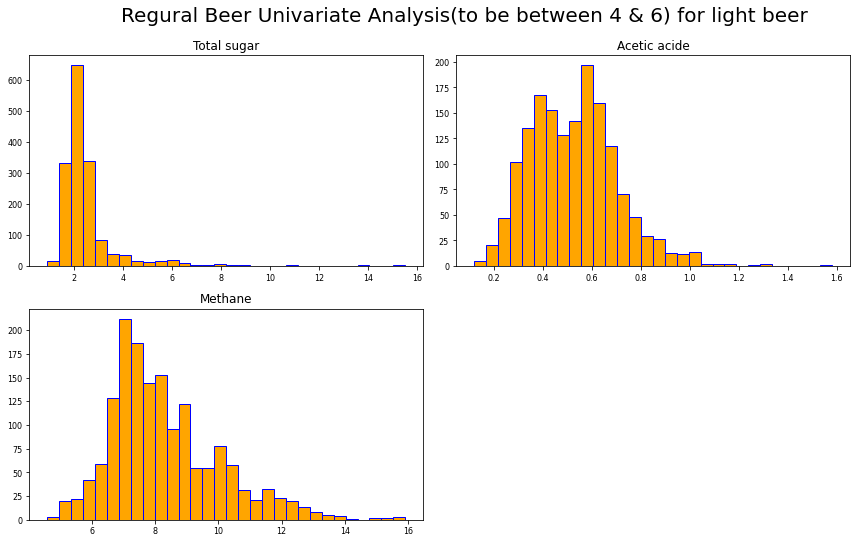

In [8]:
features_list = list(Banana_quality_assessment.columns[:-1])
Banana_quality_assessment[features_list].hist(bins=30, 
                       edgecolor='b', 
                       linewidth=1.0,
                       xlabelsize=8, 
                       ylabelsize=8, 
                       grid=False, 
                       figsize=(10,6), 
                       color='orange')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Regural Beer Univariate Analysis(to be between 4 & 6) for light beer', x=0.65, y=1.25, fontsize=20);

In [9]:
X = Banana_quality_assessment.drop('quality', axis=1)
Y = Banana_quality_assessment['quality']
X.shape, Y.shape


((1599, 3), (1599,))

In [11]:
array = Banana_quality_assessment.values
X = array[:,0:10]
Y = array[:,3]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,test_size=test_size, random_state=seed)

In [12]:
X_train.shape,Y_train.shape

((1071, 4), (1071,))

In [13]:
X_test.shape,Y_test.shape

((528, 4), (528,))

In [14]:
type(X_train)

numpy.ndarray

# eLab Beer Quality Tester training  model

In [15]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/opt/anaconda3/envs/ACEIOT/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print("Training accuracy= {:.2f} %".format(model.score(X_train,Y_train)*100))

Training accuracy= 90.10 %


In [17]:
print("Testing accuracy= {:.2f} %".format(model.score(X_test,Y_test)*100))

Testing accuracy= 89.58 %


In [18]:
filename = 'Beer_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [19]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result*100)

89.58333333333334


In [ ]:
model.save('Beer_model.h5')